In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [4]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [5]:
import tensorflow as tf
tf.__version__

'1.14.0'

# 標題一
## 標題二
###### 標題六

### 標題三

* 紅
    * 粉紅
* 藍
* 綠

1. Number 1
1. Number 2
1. Number 3
1. Number 4

```
a = 0
for i in range(10):
    a = a + i
```

$f(x)=x^2 $

$ f(x)=3x^2 + 2xy + y^2 $

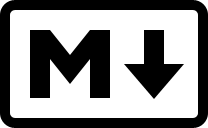
圖片來源: [markdown.tw](https://markdown.tw/images/208x128.png)

## 微分 Differentiation

$ f(x) = ax^n $

$ \frac{df(x)}{dx}=anx^{n-1}$

$f(x)=2x^3+5x+2$

對x微分

$\frac{df(x)}{dx}=6x^2+5$

## 偏微分 Partial Differentiation

$f(x,y)=2x^3 + 6xy^2 +4y +2$

對x微分

$\frac{\partial f(x,y)}{\partial x} = 6x^+6y^2$

對y微分

$\frac{\partial f(x,y)}{\partial x} = 12xy+4$

## 連鎖率 Chain Rule

假設 : $f(x)=(2x^3+5x+2)^4$

函數 $g(x)$ : $f(h)=h^4$

函數 $h(x)$ : $h(x)=2x^3+5x+2$

合成函數 $f(x)=g(h(x))$

$\frac{\partial f(x)}{\partial x} = \frac{\partial f(h)}{\partial h} \frac{\partial h(x)}{\partial x}$

函數$g(x)$微分 : $\frac{\partial f(h)}{\partial h} = 4h^3$

函數$h(x)$微分 : $\frac{\partial h(x)}{\partial x} = 6x^2+5$


## 感知器 Perceptron

$z = (\sum_{i=1}^n w_ix_i)+b$

 $f(x) =\begin{cases}1  & 如果xw+b>s \\0 & 否則\end{cases} $
 
 參考網址 : [Sciweavers-iTex2Img](http://www.sciweavers.org/free-online-latex-equation-editor)

In [13]:
class person():
    def __init__(self,_name,_gender,_birth):
        self.name=_name
        self.gender=_gender
        self.birth=_birth
        
Cheng_Wen = person('Cheng-Wen','Male','2020-10-24')

print ("Cheng_Wen's name: %s" %Cheng_Wen.name)
print ("Cheng_Wen's gender: %s" %Cheng_Wen.gender)
print("Cheng_Wen's birth: %s" %Cheng_Wen.birth)

Cheng_Wen's name: Cheng-Wen
Cheng_Wen's gender: Male
Cheng_Wen's birth: 2020-10-24


In [14]:
### __call__()的用法:能夠讓類別實例對象, 像函數一樣被調用

class A(object):
    def __call__(self,x):
        print('__call_called, print x: ',x)
        
a = A()
a('123')

__call_called, print x:  123


## Python classmethod 和 staticmethod 用法
1. classmethod 和 staticmethod 都可以不用例項化直接呼叫
2. 在不改變已經寫好的類裡面的方法的情況下, 用 classmethod 對輸入資料進行處理

staticmethod就不用再訂一個 class 變數給它


In [18]:
class Test():
    def __init__(self,a,b):
        self.a=int(a)
        self.b=int(b)

    def print_out(self):
        print("print out:",self.a + self.b)
        
    @classmethod
    def classmethod_sum(cls,a,b):
        cls.a=int(a)
        cls.b=int(b)
        print('classmethod_sum:',cls.a + cls.b)

    @staticmethod
    def staticmethod_sum(a,b):
        print("staticmethod_sum:",a + b)
        
    @classmethod
    def list_to_num(cls, list_num):
        print(type(cls(list_num[0],list_num[1])))
        return cls(list_num[0],list_num[1])


c = Test(1,2)  #這個是呼叫 __init__
c.print_out()  #這個就是呼叫print_out, 因為 __init__有給了a,b值
c.classmethod_sum(3,5)
c.staticmethod_sum(6,5)

print out: 3
classmethod_sum: 8
staticmethod_sum: 11


In [22]:
# Ch3_3_2.py

import numpy as np

class Perceptron:
    def __init__(self,input_length, weights=None, bias=None):
        if weights is None:
            self.weights = np.ones(input_length) * 1
        else:
            self.weights = weights
        
        if bias is None:
            self.bias = -1
        else:
            self.bias = bias
            
    @staticmethod
    def activation_function(x):
        if x > 0:
            return 1
        return 0
    
    def __call__(self,input_data):
        weighted_input = self.weights * input_data
        weighted_sum = weighted_input.sum() + self.bias
        return Perceptron.activation_function(weighted_sum)
    
weights = np.array([1,1])
bias = -1
AND_Gate = Perceptron(2,weights, bias)

input_data = [np.array([0,0]),np.array([0,1]),
             np.array([1,0]),np.array([1,1])]

for x in input_data:
    out = AND_Gate(np.array(x))
    print(x,out)
    

[0 0] 0
[0 1] 0
[1 0] 0
[1 1] 1


In [32]:
# Ch3_3_2.py

import numpy as np

class Perceptron:
    def __init__(self,input_length, weights=None, bias=None):
        if weights is None:
            self.weights = np.ones(input_length) * 1
        else:
            self.weights = weights
        
        if bias is None:
            self.bias = -1
        else:
            self.bias = bias
            
    @staticmethod
    def activation_function(x):
        if x > 0:
            return 1
        return 0
    
    def __call__(self,input_data):
        weighted_input = self.weights * input_data
        weighted_sum = weighted_input.sum() + self.bias
        return Perceptron.activation_function(weighted_sum)
    
weights = np.array([1,1])
bias = -0.5
OR_Gate = Perceptron(2,weights, bias)

input_data = [np.array([0,0]),np.array([0,1]),
             np.array([1,0]),np.array([1,1])]

for x in input_data:
    out = OR_Gate(np.array(x))
    print(x,out)
    

[0 0] 0
[0 1] 1
[1 0] 1
[1 1] 1


In [33]:
# Ch3_3_2.py

import numpy as np

class Perceptron:
    def __init__(self,input_length, weights=None, bias=None):
        if weights is None:
            self.weights = np.ones(input_length) * 1
        else:
            self.weights = weights
        
        if bias is None:
            self.bias = -1
        else:
            self.bias = bias
            
    @staticmethod
    def activation_function(x):
        if x > 0:
            return 1
        return 0
    
    def __call__(self,input_data):
        weighted_input = self.weights * input_data
        weighted_sum = weighted_input.sum() + self.bias
        return Perceptron.activation_function(weighted_sum)
    
weights = np.array([-0.5,-0.5])
bias = 1
OR_Gate = Perceptron(2,weights, bias)

input_data = [np.array([0,0]),np.array([0,1]),
             np.array([1,0]),np.array([1,1])]

for x in input_data:
    out = OR_Gate(np.array(x))
    print(x,out)

[0 0] 1
[0 1] 1
[1 0] 1
[1 1] 0


In [48]:
# Ch3_3_2.py
# 這是調不出來的

import numpy as np

class Perceptron:
    def __init__(self,input_length, weights=None, bias=None):
        if weights is None:
            self.weights = np.ones(input_length) * 1
        else:
            self.weights = weights
        
        if bias is None:
            self.bias = -1
        else:
            self.bias = bias
            
    @staticmethod
    def activation_function(x):
        if x > 0:
            return 1
        return 0
    
    def __call__(self,input_data):
        weighted_input = self.weights * input_data
        weighted_sum = weighted_input.sum() + self.bias
        return Perceptron.activation_function(weighted_sum)
    
weights = np.array([1,-2])
bias = -0.5
XOR_Gate = Perceptron(2,weights, bias)

input_data = [np.array([0,0]),np.array([0,1]),
             np.array([1,0]),np.array([1,1])]

for x in input_data:
    out = XOR_Gate(np.array(x))
    print(x,out)

[0 0] 0
[0 1] 0
[1 0] 1
[1 1] 0


## 3-4 深度學習的資料 - 張量

In [52]:
x = np.array(10.5)

print(x)
print(x.ndim)
print(x.shape)

10.5
0
()


In [53]:
#1D

x = np.array([1,2,5.5,8.7,10.5])

print(x)
print(x.ndim)
print(x.shape)

[[1.2 5.5 8.7 8.5]]
2
(1, 4)


In [54]:
#2D

x = np.array([[1.2,5.5,8.7,8.5],
              [2.2,4.3,6.5,9.5],
              [6.2,7.3,1.5,3.5]
             ])
print(x)
print(x.ndim)
print(x.shape)

[[1.2 5.5 8.7 8.5]
 [2.2 4.3 6.5 9.5]
 [6.2 7.3 1.5 3.5]]
2
(3, 4)


In [56]:
#3D 

x = np.array([[[1.2,5.5,8.7,8.5],
              [2.2,4.3,6.5,9.5]],
              [[6.2,7.3,1.5,3.5],
              [6.5,9.5,6.5,4.4]],
              [[6.2,7.3,7.7,8.5],
               [1.5,3.5,8.8,9.2]]
             ])
print(x)
print(x.ndim)
print(x.shape)

[[[1.2 5.5 8.7 8.5]
  [2.2 4.3 6.5 9.5]]

 [[6.2 7.3 1.5 3.5]
  [6.5 9.5 6.5 4.4]]

 [[6.2 7.3 7.7 8.5]
  [1.5 3.5 8.8 9.2]]]
3
(3, 2, 4)
